## Install libraries

In [1]:
!pip install pandas
!pip install seaborn
!pip install sklearn
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=c55a2755042bccbebcafc34395471b6fc2e75bbb7b94f2421d8a32199c2f8f43
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: f

In [2]:
# We'll need numpy and pandas for basic data wrangling
import numpy as np
import pandas as pd

# We'll need matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# We'll use some preprocessing from scikit-learn:
#  Standard scaling (z-scoring) and label encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Our classifier will be 1-nearest-neighbor after learning the distance metric
from sklearn.neighbors import KNeighborsClassifier

# Pipelines make it a little easier to manage sequences of models,
# eg scaler -> metric learner -> 1nn
from sklearn.pipeline import make_pipeline

# We'll use some standard machinery for reporting accuracy of our models
from sklearn.metrics import classification_report,  plot_confusion_matrix

from sklearn.model_selection import train_test_split


RNG_STATE = 0

from google.colab import files


## Data loading

Please upload the data.csv file generated previously. 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data_file = '/content/gdrive/MyDrive/Colab Notebooks/Music Information Retrieval/Week 2/Assignment/Tonic classification with low level MusicExtractor() features/data.csv'

#uploaded = files.upload()

#Read data with pandas module

data = pd.read_csv(data_file)

#Plot first lines of our data
data.head()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,spectral_rolloff.stdev,spectral_skewness.mean,spectral_skewness.stdev,spectral_spread.mean,spectral_spread.stdev,spectral_strongpeak.mean,spectral_strongpeak.stdev,zerocrossingrate.mean,zerocrossingrate.stdev,tonic
0,0.990684,15.045286,1.854457,0.372195,0.078171,155.698425,116.191475,7.763120,2.870029,1.459613,...,104.330238,4.505210,0.720354,3449997.25,2149744.25,0.623849,0.403493,0.008395,0.002812,b
1,0.990684,14.898280,2.280415,0.391228,0.083327,133.322464,80.732315,6.428464,1.788766,1.242456,...,54.856857,5.026468,0.800210,3145256.00,2228093.25,0.763095,0.469566,0.006445,0.001386,b
2,0.990684,14.472402,2.531276,0.355560,0.088243,104.285118,69.695938,5.909654,2.103197,1.706020,...,67.465721,4.368255,0.802401,4535478.50,5375153.00,0.743537,0.436122,0.005964,0.001557,b
3,0.990684,15.161849,1.408289,0.372373,0.072589,196.814804,126.745834,8.861809,3.526606,1.458768,...,93.040909,4.677685,0.927602,3632668.25,3444228.00,0.574670,0.406087,0.008301,0.001870,b
4,0.990684,9.315184,1.707345,0.149848,0.008073,1.450477,1.422889,1.010031,0.392941,13.218195,...,186.405289,2.912083,0.371276,5415187.00,4073531.50,0.562442,0.492694,0.031494,0.012608,b


Train test splitting using sklearn

In [5]:
X_train, X_test, y_train_text, y_test_text = train_test_split(data[data.columns[:-1]],data[data.columns[-1]], test_size=0.2, random_state=RNG_STATE)
#print('X_train')
#X_train
print(y_train_text)
y_train_text
#print('X_test')
#X_test
print('y_test_text')
y_test_text

6729      e
3850      d
1551      c
415       b
5235    dsh
       ... 
4931    dsh
3264    csh
1653      c
2607    csh
2732    csh
Name: tonic, Length: 5483, dtype: object
y_test_text


4962    dsh
1668      c
4694    dsh
4500    dsh
119       b
       ... 
4000      d
1540      c
2932    csh
1788      c
2337      c
Name: tonic, Length: 1371, dtype: object

We need to encode the output labels as numbers, to have them as targets for machine learning models. 

In [6]:
# We'll need to use a label encoder to encode our instrument
# names as numeric identifiers (0, 1, 2, ..., 9)
'''
docs for sklearn.preprocessing.LabelEncoder

Encode target labels with value between 0 and n_classes-1.
This transformer should be used to encode target values, i.e. y, and not the input X.
'''
encoder = LabelEncoder()

# "Fit" on the training labels; this is really just specifying our vocabulary
# transform maps the encoding over the list of strings to give our encoded label array
y_train = encoder.fit_transform(y_train_text) # Fit label encoder and return encoded labels.

# Since the encoder is already fit, we can now transform our test set labels as well
y_test = encoder.transform(y_test_text)

## Feature pre-processing and classification

We use a StandardScaler to do a feature normalization such as the input features have a mean zero and standard deviation 1. 
We then build a pipeline chaining the feature pre-processing and the classifier, in this case a KNN 

              precision    recall  f1-score   support

           b       0.56      0.59      0.57       240
           c       0.49      0.42      0.45       232
         csh       0.39      0.47      0.43       207
           d       0.48      0.48      0.48       190
         dsh       0.82      0.79      0.80       280
           e       0.86      0.83      0.85       222

    accuracy                           0.61      1371
   macro avg       0.60      0.60      0.60      1371
weighted avg       0.61      0.61      0.61      1371



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


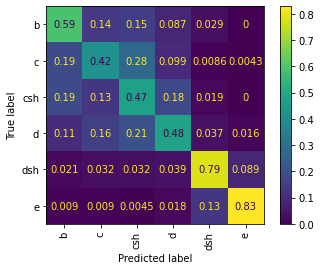

In [7]:
'''
sklearn.preprocessing.StandardScaler()

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False,
and s is the standard deviation of the training samples or one if with_std=False.
'''

# Our classifier is a "pipeline": scaling followed by KNN
clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
'''
A machine learning pipeline is the end-to-end construct
that orchestrates the flow of data into, and output from, a machine learning model (or set of multiple models)

sklearn.pipeline.Pipeline docs
Pipeline of transforms with a final estimator.

Parameters:
stepslist of tuple
List of (name, transform) tuples (implementing fit/transform)
that are chained in sequential order. The last transform must be an estimator.
'''

# Fit all stages of the pipeline to our training data
clf.fit(X_train, y=y_train)

# How well does our 1-Nearest neighbor model work?
y_pred = clf.predict(X_test)

# Compare our predictions to the true labels in y_test
'''
sklearn.metrics.classification_report

Parameters:
  y_true1d array-like, or label indicator array / sparse matrix
Ground truth (correct) target values.

  y_pred1d array-like, or label indicator array / sparse matrix
Estimated targets as returned by a classifier.

  labelsarray-like of shape (n_labels,), default=None
Optional list of label indices to include in the report.

  target_nameslist of str of shape (n_labels,), default=None
Optional display names matching the labels (same order).
'''
report = classification_report(y_test, y_pred, target_names=encoder.classes_)

print(report)

# Finally, plot a confusion matrix showing how mistakes are distributed
plot_confusion_matrix(clf, X_test, y_test, display_labels=encoder.classes_, xticks_rotation='vertical', normalize='true');

## Feature visualization

In [8]:
### How to visualize features using metric learning https://github.com/bmcfee/ismir2020-metric-learning
# scikit-learn provides Linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Finally, umap will let us map high-dimensional data down to 2-d for plotting
import umap

We visualize the data by applying a transformation using UMAP from a high dimensional space to a low dimensional space. Similarly to the PCA reduction, the output axes do not hold any specific meaning.

In [9]:
reducer = umap.UMAP(random_state=RNG_STATE)

# We'll apply all but the last stage (KNN classifier) of our pipeline to the data.
# In this case, we just have one previous stage, which does feature normalization.
# This will change in subsequent examples.

X_train_transformed = clf[:-1].transform(X_train)
X_test_transformed = clf[:-1].transform(X_test)

# Fit on the transformed data, and then transform the test data
embed = reducer.fit_transform(X_train_transformed)
embed_test = reducer.transform(X_test_transformed)

In the plot the different classes are plotted with different colors, while the train and test datasets are denoted by x or circles.
If the test and training data of the same color appear near each other in the visualization, then nearest neighbor classification should work well.

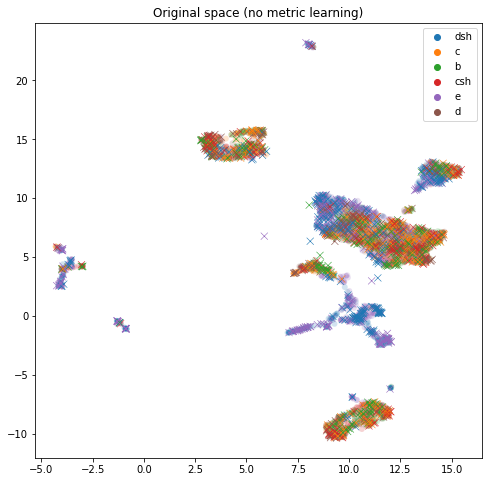

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=embed[:, 0], y=embed[:, 1], hue=y_train_text, marker='o', alpha=0.2, legend=None, ax=ax)
sns.scatterplot(x=embed_test[:, 0], y=embed_test[:, 1], hue=y_test_text, marker='x', s=50, alpha=1, legend='brief', ax=ax)
ax.legend(bbox_to_anchor=(1, 1));
ax.set(title='Original space (no metric learning)');

## Linear projection of features

We use Linear Discriminant Analysis to better separate the classes by learning a 9-dimensional projection of the features. 

[Pipeline] .... (step 1 of 3) Processing standardscaler, total=   0.0s
[Pipeline]  (step 2 of 3) Processing lineardiscriminantanalysis, total=   0.1s
[Pipeline]  (step 3 of 3) Processing kneighborsclassifier, total=   0.0s
              precision    recall  f1-score   support

           b       0.43      0.46      0.45       240
           c       0.42      0.39      0.41       232
         csh       0.34      0.38      0.36       207
           d       0.40      0.34      0.37       190
         dsh       0.84      0.85      0.85       280
           e       0.87      0.88      0.87       222

    accuracy                           0.57      1371
   macro avg       0.55      0.55      0.55      1371
weighted avg       0.57      0.57      0.57      1371



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


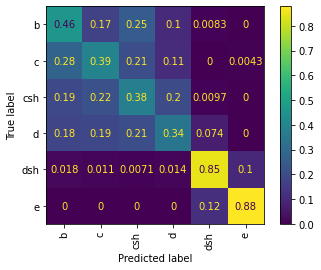

In [11]:
clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(), KNeighborsClassifier(n_neighbors=1), verbose=True)
clf.fit(X_train, y=y_train)

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, target_names=encoder.classes_)

print(report)

plot_confusion_matrix(clf, X_test, y_test, display_labels=encoder.classes_, xticks_rotation='vertical', normalize='true');

Let's visualize the results: 

In [12]:
reducer = umap.UMAP(random_state=RNG_STATE)

# We'll fit the umap embedding on the data after applying our learned transformation
embed = reducer.fit_transform(clf[:-1].transform(X_train))
embed_test = reducer.transform(clf[:-1].transform(X_test))

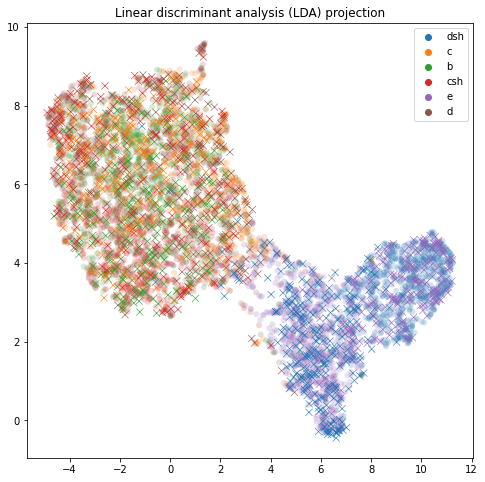

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=embed[:, 0], y=embed[:, 1], hue=y_train_text, marker='o', alpha=0.2, legend=None, ax=ax)
sns.scatterplot(x=embed_test[:, 0], y=embed_test[:, 1], hue=y_test_text, marker='x', s=50, alpha=1, legend='brief', ax=ax)
ax.legend(bbox_to_anchor=(1, 1));
ax.set(title='Linear discriminant analysis (LDA) projection');

The projection learned by LDA tells us the weight assigned to each of the training features. 

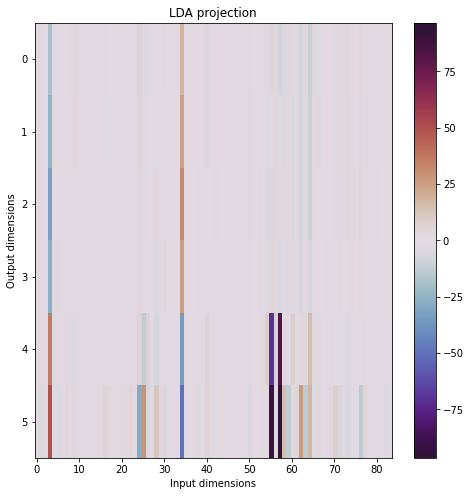

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
model = clf.steps[1][1]
weights = model.coef_

img = ax.imshow(weights, cmap='twilight_shifted', vmin=-np.abs(weights).max(), vmax=np.abs(weights).max(), aspect='auto', interpolation='none')
fig.colorbar(img, ax=ax)
ax.grid(False)
ax.set(xlabel='Input dimensions', ylabel='Output dimensions', title='LDA projection');

Which features are given more importance? 

In [15]:
for i in range(len(weights)):
  print(data.columns[:-1][weights[0]>100])

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
